In [18]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
print(os.getcwd())

c:\Users\fredy\Downloads\python_snake_rl


In [19]:
df = pd.read_csv("csv_home_prices.csv")
print(df.head())

   area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000


Text(0, 0.5, 'price')

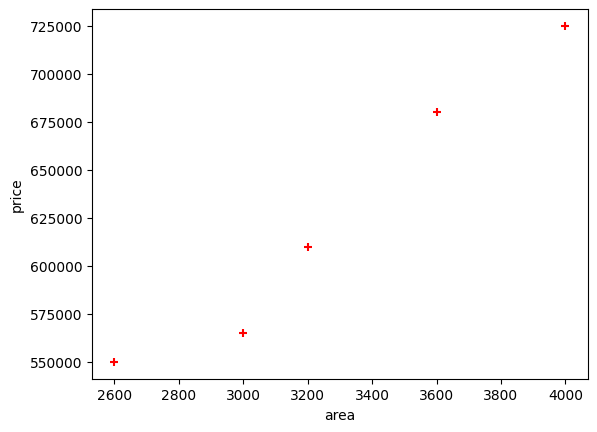

In [13]:
plt.scatter(df.area, df.price, color = 'red', marker = '+')
plt.xlabel('area')
plt.ylabel('price')

In [20]:
#Implementing from scratch 
def loss(m, b, points):
    error = 0
    for i in range(len(points)):
        x = points.iloc[i].area
        y = points.iloc[i].price

        error += (y - (m * x + b)) ** 2

    error / float(len(points))


def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0

    n = len(points)

    for i in range(n):
        x = points.iloc[i].area_norm
        y = points.iloc[i].price_norm

        m_gradient += - (2/n) * x * (y - (m_now * x + b_now))
        b_gradient += (-2/n) * (y - m_now * x - b_now )

    m = m_now - m_gradient * L
    b = b_now - b_gradient * L

    print("This is m, b from the function", m, b)
    return (m, b)




In [21]:
m = 0
b = 0
L = 0.01
epochs = 1000

#Need to normalize things
area_mean = df.area.mean()
area_std = df.area.std()
price_mean = df.price.mean()
price_std = df.price.std()

df['area_norm'] = (df.area - area_mean) / area_std
df['price_norm'] = (df.price - price_mean) / price_std

print(df)


   area   price  area_norm  price_norm
0  2600  550000  -1.258396   -1.014010
1  3000  565000  -0.518163   -0.813876
2  3200  610000  -0.148047   -0.213476
3  3600  680000   0.592187    0.720480
4  4000  725000   1.332420    1.320881


This is m, b from the function 0.015663911042198463 1.1102230246251566e-18
This is m, b from the function 0.03107719950772175 1.1102230246251566e-18
This is m, b from the function 0.046243875357796664 1.1102230246251566e-18
This is m, b from the function 0.06116788439427038 2.220446049250313e-18
This is m, b from the function 0.07585310928616051 2.220446049250313e-18
This is m, b from the function 0.09030337057978041 2.220446049250313e-18
This is m, b from the function 0.10452242769270238 1.6653345369377347e-18
This is m, b from the function 0.11851397989181761 2.220446049250313e-18
This is m, b from the function 0.132281667255747 2.220446049250313e-18
This is m, b from the function 0.14582907162185352 3.3306690738754695e-18
This is m, b from the function 0.15915971751810232 3.8857805861880475e-18
This is m, b from the function 0.17227707308001114 3.330669073875469e-18
This is m, b from the function 0.1851845509529294 2.7755575615628907e-18
This is m, b from the function 0.197885509179

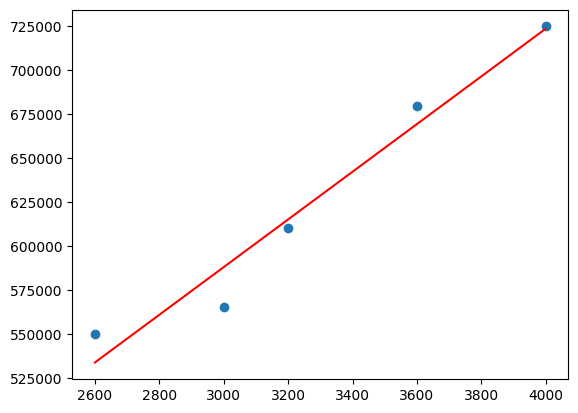

In [22]:
for i in range(epochs):
    # if i % 50 == 0:
        # print(f"Epoch {i} with m: {m}, b: {b}")
    m, b = gradient_descent(m, b, df, L)

print("This is M, b", m, b)

m_original = m * price_std / area_std
b_original = b * price_std + price_mean - m * price_std * area_mean / area_std

plt.scatter(df.area, df.price)
x_range = list(range(int(df.area.min()), int(df.area.max())))
plt.plot(x_range, [m_original * x + b_original for x in x_range], color="red")
plt.show()

In [32]:
#Now Im just going to use packages
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X = df[['area']]
Y = df[['price']]

# print(len(X))
# print(len(Y))

# print(X, Y)

X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y)

print(X_scaled)
print(df)

[[-1.40693001]
 [-0.57932412]
 [-0.16552118]
 [ 0.66208471]
 [ 1.4896906 ]]
   area   price  area_norm  price_norm
0  2600  550000  -1.258396   -1.014010
1  3000  565000  -0.518163   -0.813876
2  3200  610000  -0.148047   -0.213476
3  3600  680000   0.592187    0.720480
4  4000  725000   1.332420    1.320881


In [34]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X = df[['area']]  # needs to be 2D for sklearn
y = df['price']

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

model = LinearRegression()
model.fit(X_scaled, y_scaled)

print(f"Sklearn coefficients (normalized): {model.coef_[0]:.4f}, {model.intercept_:.4f}")

# Convert back to original scale
m_original = model.coef_[0] * scaler_y.scale_[0] / scaler_X.scale_[0] 
b_original = (model.intercept_ * scaler_y.scale_[0] + scaler_y.mean_[0] - 
              model.coef_[0] * scaler_y.scale_[0] * scaler_X.mean_[0] / scaler_X.scale_[0])

print(f"Original scale: m={m_original:.2f}, b={b_original:.2f}")

Sklearn coefficients (normalized): 0.9790, 0.0000
Original scale: m=135.79, b=180616.44
